In [1]:
import torchvision.transforms as transforms
from torchvision.transforms import (Compose,Normalize)
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import torchattacks

device="cpu"

In [2]:
import torch

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [4]:
def load_image(img_path, transform):
    image = Image.open(img_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

In [5]:
model = models.resnet18(pretrained=True).to(device)
model.eval()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
img_path = '../images/Example_image_5.jpg'  # Replace with your image path
image = load_image(img_path, transform)
image = image.to(device)

In [7]:
image.shape

torch.Size([1, 3, 348, 275])

In [8]:
originl_pred=model(image)
original_pred=originl_pred.argmax()
original_pred

tensor(550)

In [9]:
label = torch.tensor([original_pred]).to(device)  # Replace with the correct label for your image

In [10]:
attack=torchattacks.EADEN(model, kappa=0, lr=0.01, max_iterations=100  )
adv_image=attack(image,label)

In [11]:
new_pred=model(adv_image)
new_pred=new_pred.argmax()
new_pred

tensor(897)

In [12]:
original_image = image.squeeze(0).cpu().detach().numpy().transpose((1, 2, 0))  # Convert to NumPy array and reshape
adversarial_image = adv_image.squeeze(0).cpu().detach().numpy().transpose((1, 2, 0))

differnce=np.abs(original_image-adversarial_image).mean(axis=-1)
difference=differnce/differnce.max()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1419054e-06..1.0000013].


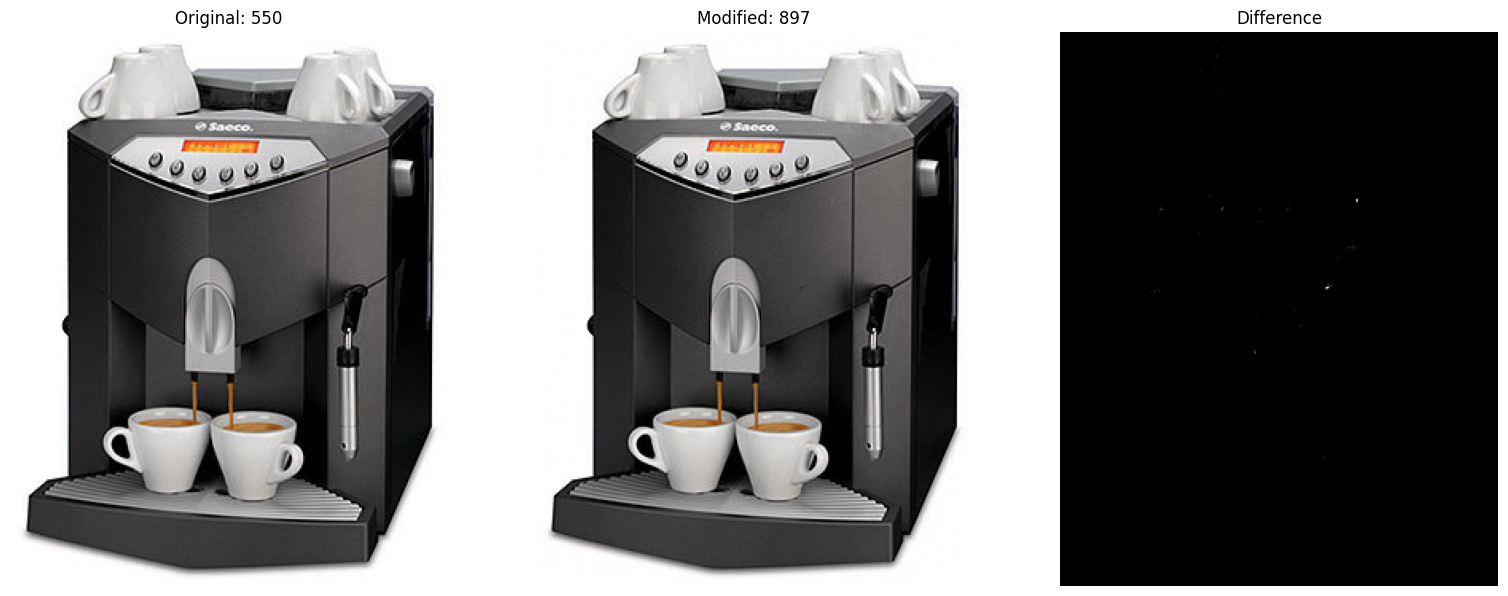

In [13]:

_, (ax_orig, ax_new, ax_diff) = plt.subplots(1, 3, figsize=(19.20,10.80))

ax_orig.imshow(original_image)
ax_new.imshow(adversarial_image)
ax_diff.imshow(difference, cmap="gray")

ax_orig.axis("off")
ax_new.axis("off")
ax_diff.axis("off")

ax_orig.set_title(f"Original: {original_pred}")
ax_new.set_title(f"Modified: {new_pred}")
ax_diff.set_title("Difference")

plt.savefig("AttackedImages/OnePixel_attack.png")